# Анна Тимошенко (Дата Аналитик)
# Задание #2 Pandas

## Инструменты и ресурсы для выполнения задания

### Библиотеки Python

  * [Pandas](http://pandas.pydata.org/)
    - [Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
    - [Easier data analysis in Python with pandas](http://www.dataschool.io/easier-data-analysis-with-pandas/)

### Ресурсы по Titanic dataset
  * [Сам конкурс](https://www.kaggle.com/c/titanic)
  * [Пример решения конкурса](http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Еще пример](https://habrahabr.ru/company/mlclass/blog/270973/)
  
## Разминка
**Как и в предыдущем задании здесь запрещено использовать циклы, если это специально не оговорено.**
1. Скачайте Titanic dataset и загрузите его в pandas.DataFrame; выведите первые 5 записей в ноутбук. Как можно интерпретировать данную таблицу?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В таблице содержатся данные о пассажирах, содержание части атрибутов понятно сразу по наименованию:
* PassengerId - id пассажира, порядковый номер записи в таблице
* Survived - выжил ли: 1 - да, 0 - нет
* Pclass - класс (пока не понятно сколько всего, предположительно, 3)
* Name - имя: Фамилия, отделённая запятой от Имени и дополнительного имени в скобках
* Sex - пол: male, female
* Age - возраст
* SibSp - ? (из описания датасета узнаём: это количество сиблингов или супругов на борту)
* Parch - ? (из описания датасета: это количество родителей или детей на борту)
* Ticket - номер билета	
* Fare - стоимость (билета)
* Cabin - номер каюты
* Embarked - ? (из описания датасета: место посадки: C = Cherbourg, Q = Queenstown, S = Southampton)

2. Получите имена столбцов.

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3. Перемешайте строки в случайном порядке.

In [4]:
# тк. функция pandas.DataFrame.sample не меняет исходный датафрейм, а просто возвращает результат, 
# его имеет смысл сохранить в какую-то переменную (сбрасываю индекс для удобства работы, это необязательно)
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_shuffled

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
1,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
2,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C
3,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
4,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
887,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
888,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
889,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,NaN,S


4. Получите случайную подвыборку данных с возвращением и без.

In [5]:
# та же функция используется для получения случайной подвыборки
# без возвращения, подвыборка размером 50% от исходной 
# (атрибут random_state нужен для того, 
# чтобы получать всегда один и тот же результат с одним и тем же значением атрибута):
df_50percent = df.sample(frac=0.5, random_state=1).reset_index(drop=True)
df_50percent

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
1,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
2,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
3,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
4,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
441,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
442,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
443,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
444,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S


In [6]:
# подвыборка с возвращением (задаём количество строк, а не долю)
df_n100 = df.sample(n=100, replace=True, random_state=1).reset_index(drop=True)
df_n100

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
1,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
2,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
3,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
4,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
96,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
97,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S
98,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S


In [7]:
# Можем видеть, что если в исходном датафрейме количество ID пассажиров равнялось количеству строк 
# (т.е. каждая строка имела уникальный PassengerId)
# То в получившейся выборке 100 записей с возвращением уникальных PassengerId < 100
print('', df.shape[0], '- Количество строк в исходном датафрейме\n', 
      df.PassengerId.nunique(), '- Количество уникальных PassengerId в исходном датафрейме\n',  
      df_n100.PassengerId.nunique(), '- Количество уникальных PassengerId в выборке с возвращением')

 891 - Количество строк в исходном датафрейме
 891 - Количество уникальных PassengerId в исходном датафрейме
 97 - Количество уникальных PassengerId в выборке с возвращением


5. Разбейте данные случайным образом на две непересекающиеся подвыборки.

Обеспечить непересекаемость двух выборок можно следующим образом:

Брать выборки из первой и второй половин **предварительно перемешанного** датафрейма

In [8]:
df_shuffled.shape[0] / 2

445.5

In [9]:
# Если мы хотим дополнительно перемешать выборки
df_sample1 = df_shuffled[:445].sample(frac=1, random_state=1).reset_index(drop=True)
df_sample2 = df_shuffled[445:].sample(frac=1, random_state=1).reset_index(drop=True)

Проверим, что выборки не пересекаются с помощью PassengerId

In [10]:
set(df_sample1.PassengerId.unique()).intersection(set(df_sample2.PassengerId.unique()))

set()

In [11]:
df_sample2.shape[0]

446

In [12]:
# Или так
df_sample2[df_sample2.PassengerId.isin(df_sample1.PassengerId)]
# Возвращает пустой датафрейм

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


6. Проверьте, является ли признак **Name** уникальным для каждого пассажира, если да, то сделайте его новым индексом данных.

In [13]:
# Сравним количество строк в исходном датафрейме и количество уникальных Name
# если они равны, то признак Name является уникальным
df.shape[0] == df.Name.nunique()

True

In [14]:
dfName = df.set_index('Name')
dfName

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


7. Проверьте, содержат ли данные пропуски, если да, то заполните их.

In [15]:
# посмотрим количество na в каждой колонке
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Таким образом, требуется заполнить пропуски в Embarked, Age, Cabin

Т.к. пропуски могут иногда фигурировать в виде нулей в числовых данных, либо в виде пробелов, прочерков и тп. в текстовых данных, посмотрим отдельно уникальные значения в некоторых других колонках

In [16]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [17]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [18]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [19]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [20]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [21]:
df.Fare.sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64

По всей видимости, нулевые значения Fare тоже являются пропусками

In [22]:
# Сколько нулевых значений
df[df.Fare == 0].shape[0]

15

In [23]:
# отсортируем по длине значения атрибута Name в поисках подозрительных коротких значений (например, 1 символ)
df.Name.str.len().sort_values().head()

826    12
692    12
74     13
169    13
509    14
Name: Name, dtype: int64

In [24]:
# посмотрим самые короткие
df[df.Name.str.len() == 12]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S


In [25]:
# то же по билетам
df.Ticket.str.len().sort_values().head()

545    3
872    3
584    4
296    4
114    4
Name: Ticket, dtype: int64

In [26]:
# посмотрим самые короткие
df[df.Ticket.str.len() == 12]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.50,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.50,NaN,S
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.00,NaN,S
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.25,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.50,NaN,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.25,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.50,NaN,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.25,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.50,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.50,NaN,S


In [27]:
# Интересно, кстати, что значения Ticket - не уникальные
print('Всего строк:', df.shape[0], '| Значений Ticket:', df.Ticket.nunique())

Всего строк: 891 | Значений Ticket: 681


Итак, требуется заполнить пропущенные значения в:
* Embarked 
* Age 
* Cabin
* Fare

Так как я прочла рекомендуемый [пример](https://habrahabr.ru/company/mlclass/blog/270973/) я бы последовала за автором в подходе к заполнению пропусков в атрибутах Embarked и Age

In [28]:
df.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


Наиболее часто встречающийся порт посадки: S, заполним два пропуска этим значением

In [29]:
df['Embarked'] = df.Embarked.fillna('S')

По заполнению Age решение очень изящное, повторим всё то же в пандасе

Создадим колонку, в которую поместим гоноратив, извлечённый из признака Name

In [30]:
def get_honorific(string):
    return string.split(', ')[1].split(' ')[0]

In [31]:
df['Honorific'] = df['Name'].apply(get_honorific)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [33]:
# посмотрим какие гоноративы встречаются в строках с пропущенным значением Age
df[df.Age.isna()].Honorific.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.'], dtype=object)

In [34]:
# посмотрим среднее значение возраста по пассажирам с этими гоноративами
hl = df[df.Age.isna()].Honorific.unique().tolist()
df[df.Honorific.isin(hl)].groupby('Honorific')['Age'].mean()

Honorific
Dr.        42.000000
Master.     4.574167
Miss.      21.773973
Mr.        32.368090
Mrs.       35.898148
Name: Age, dtype: float64

In [35]:
# используем словарь для заполнения пропущенных значений Age средними значениями возраста по гоноративам
# средние значения округлим до целых
Ages = df[df.Honorific.isin(hl)].groupby('Honorific')['Age'].mean().round(0).to_dict()
Ages

{'Dr.': 42.0, 'Master.': 5.0, 'Miss.': 22.0, 'Mr.': 32.0, 'Mrs.': 36.0}

In [36]:
df[df.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr.
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs.
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr.
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss.


In [37]:
# сохраним индекс первых пяти строк с пропущенным значением Age для последующей проверки
tocheck_ind = df[df.Age.isna()].head().index

In [38]:
# заполним пропуски с помощью словаря значений
df.Age = df.Age.fillna(df.Honorific.map(Ages))

In [39]:
# проверим
df.iloc[tocheck_ind]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,NaN,Q,Mr.
17,18,1,2,"Williams, Mr. Charles Eugene",male,32.0,0,0,244373,13.0000,NaN,S,Mr.
19,20,1,3,"Masselmani, Mrs. Fatima",female,36.0,0,0,2649,7.2250,NaN,C,Mrs.
26,27,0,3,"Emir, Mr. Farred Chehab",male,32.0,0,0,2631,7.2250,NaN,C,Mr.
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,22.0,0,0,330959,7.8792,NaN,Q,Miss.


Относительно признака Fare автор вышеуказанной статьи делает предположение, что нулевые значения связаны с детским возрастом

In [40]:
# Это предположение не подтверждается
df[df.Fare == 0].Age

179    36.0
263    40.0
271    25.0
277    32.0
302    19.0
413    32.0
466    32.0
481    32.0
597    49.0
633    32.0
674    32.0
732    32.0
806    39.0
815    32.0
822    38.0
Name: Age, dtype: float64

In [41]:
# последуем за вышеуказанным автором и заполним пропущенные значения Fare средними значениями для класса
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [42]:
# для последующей проверки
tocheck_ind = df[df.Fare == 0].head().index
df[df.Fare == 0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr.
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr.
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr.
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,32.0,0,0,239853,0.0,NaN,S,Mr.
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr.


In [43]:
Fares = df.groupby('Pclass')['Fare'].mean().round(4).to_dict()
# заполним пропуски с помощью словаря значений
df.loc[df['Fare'] == 0, 'Fare'] = df.loc[df['Fare'] == 0, 'Pclass'].map(Fares)

In [44]:
# Проверим, что всё получилось
df.iloc[tocheck_ind]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,13.6756,NaN,S,Mr.
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,84.1547,B94,S,Mr.
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,13.6756,NaN,S,Mr.
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,32.0,0,0,239853,20.6622,NaN,S,Mr.
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,13.6756,NaN,S,Mr.


Автор другого рекомендуемого [Примера](http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb) удаляет колонку Cabin вообще в связи с большим количеством пропусков

In [45]:
df[df.Pclass == 1].Cabin.unique()

array(['C85', 'C123', 'E46', 'C103', 'A6', 'C23 C25 C27', nan, 'B78',
       'D33', 'B30', 'C52', 'B28', 'C83', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'C90',
       'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'D11', 'B3', 'D6',
       'B8

In [46]:
df[df.Pclass == 2].Cabin.unique()

array([nan, 'D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77'], dtype=object)

In [47]:
df[df.Pclass == 3].Cabin.unique()

array([nan, 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38'],
      dtype=object)

In [48]:
df[df.Cabin.isna()].groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
Pclass,,,,,,,,,,,,
1,40,40,40,40,40,40,40,40,40,0,40,40
2,168,168,168,168,168,168,168,168,168,0,168,168
3,479,479,479,479,479,479,479,479,479,0,479,479


In [49]:
# доля пропущенных значений Cabin
round(df[df.Cabin.isna()].shape[0] / df.shape[0], 2)

0.77

Помимо того, что большая часть пропущенных значений Cabin относится к 3-му классу, никаких закономерностей в наименованиях на первый взгляд не видно, более того, значения очень разнообразны по структуре: 'T', 'E121', 'F G73', 'B57 B59 B63 B66'. Заменим все пропущенные значения на 'Unknown'

In [50]:
df.Cabin = df.Cabin.fillna('Unknown')

8. Определите, как много пассажиров ехало первым классом.

In [51]:
df[df.Pclass == 1].shape[0]

216

9. Постройте гистограмму возрастов пассажиров.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

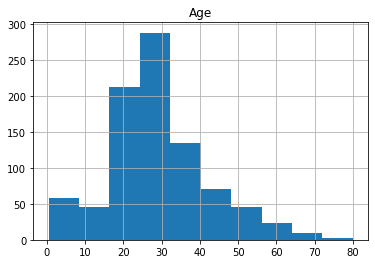

In [52]:
# Можно построить средствами pandas
df.hist(column=["Age"])

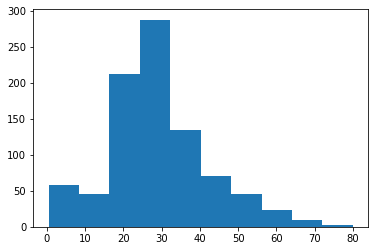

In [53]:
# Можно с использованием библиотеки matplotlib
plt.hist(df["Age"])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

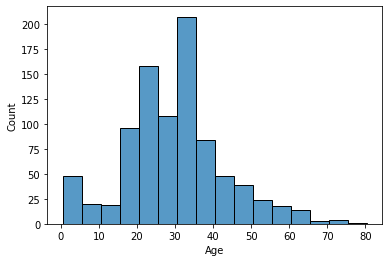

In [54]:
# Можно с использованием библиотеки seaborn
# Добавим шаг значения 5
sns.histplot(data=df, x="Age", binwidth=5)

10. Определите средний возраст пассажиров, медианный возраст, дисперсию.

In [55]:
# можно воспользоваться встроенной функцией describe
# в которой есть значения среднего (mean), стандартного отклонения (std) 
# - которое надо возвести в квадрат, чтобы получить дисперсию,
# и медианы (50%)
df['Age'].describe()

count    891.000000
mean      29.718485
std       13.260004
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
# Либо посчитать всё вышеперечисленное по отдельности:
print('Среднее:', df['Age'].mean(), '\nМедиана:', df['Age'].median(), '\nДисперсия:', df['Age'].var())

Среднее: 29.718484848484845 
Медиана: 30.0 
Дисперсия: 175.82771017364686


11. Добавьте признак, который показывает, какой процент пассажиров имели возраст строго меньше, чем данный пассажир.

In [57]:
# напишем функцию, которая считает нужный показатель и применим её к признаку Age
def count_percentage_younger(Age):
    return round(df[df.Age < Age].shape[0] * 100 / df.shape[0], 2)

In [58]:
df['Percentage_younger'] = df['Age'].apply(count_percentage_younger)

In [59]:
# посмотрим результат на последних строках
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific,Percentage_younger
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,Unknown,S,Rev.,40.29
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss.,16.05
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.45,Unknown,S,Miss.,23.34
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr.,38.27
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Unknown,Q,Mr.,52.53


12. Коррелируют ли число братьев/сестер с числом родителей/детей?

In [60]:
df.SibSp.corr(df.Parch)

0.4148376986201547

Такое значение коэффициента корреляции говорит о слабой положительной корреляционной связи

14. Есть ли зависимость между классом и номером билета?

In [61]:
df.Ticket.value_counts().head(10)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: Ticket, dtype: int64

Как уже было упомянуто ранее, номера билетов не уникальны для датасета, а кроме того имеют разную форму: разное количество букв и цифр. Поэтому не понятно, каким образом можно устанавливать зависимость между ними. Отбросив буквенную часть? (но в примере видим билет из одних букв) Или по длине (количеству символов)?

15. Какой части пассажиров удалось выжить?

In [62]:
# Так как признак обозначен единицей, можем суммировать значения Survived чтобы получить количество выживших
df.Survived.sum() / df.shape[0]

0.3838383838383838

16. Сделайте визуализацию, позволяющую ответить на вопросы:
  * Верно ли, что женщины выживали чаще мужчин?


<AxesSubplot:xlabel='Sex', ylabel='Count'>

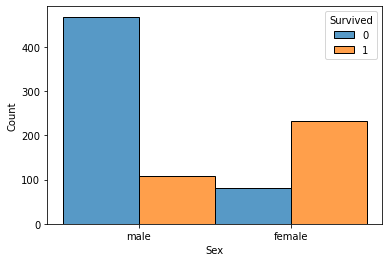

In [63]:
# можно посмотреть на графике, что в принципе женщин выжило больше, чем мужчин
sns.histplot(data=df, x="Sex", hue="Survived", multiple="dodge")

  * Верно ли, что чаще выживали пассажиры с более дорогими билетами?

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

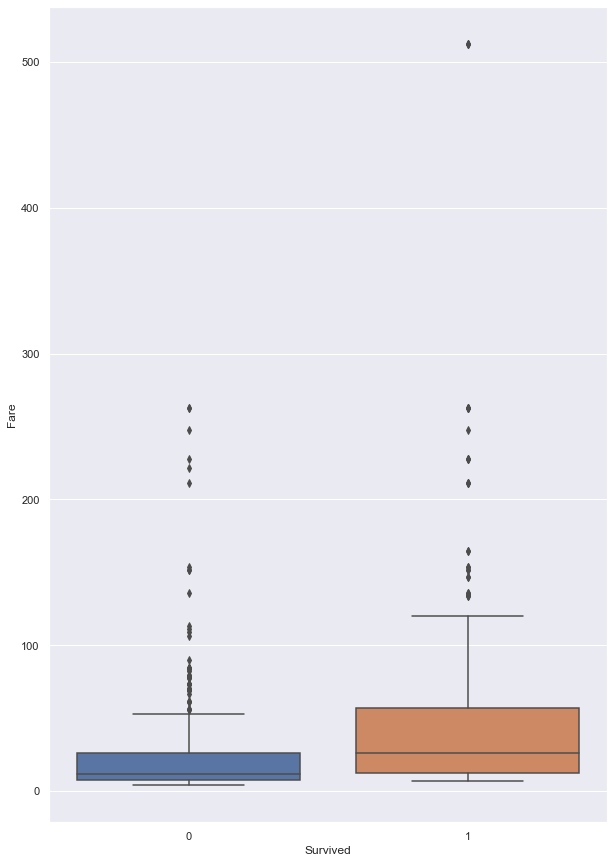

In [64]:
# на графике "ящик с усами" можно сравнить распределения Fare в случае невыживших и выживших
sns.set(rc={'figure.figsize':(10,15)})
sns.boxplot(data=df, x="Survived", y="Fare")

Можно видеть, что у выживших медиана значений Fare сравнительно больше, чем у погибших - она находится примерно на уровне третьего квартиля у невыживших, то есть 75% значений стоимости билета для погибших пассажиров оказываются меньше (либо равны) 50% значений стоимости билета у выживших.

Вывод: да, чаще выживали пассажиры с более дорогими билетами